{'BBB': [nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.04988009592326139, 0.045563549160671464, 0.05011990407673861, 0.047961630695443645, 0.054436450839328535, 0.06882494004796164, 0.0841726618705036, 0.10767386091127099, 0.13117505995203838, 0.3601918465227818], 'DEs': [nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.04244604316546763, 0.034532374100719423, 0.039328537170263786, 0.04028776978417266, 0.04748201438848921, 0.05683453237410072, 0.07026378896882494, 0.10647482014388489, 0.1434052757793765, 0.41894484412470023], 'Aleatoric': [nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.038129496402877695, 0.04124700239808154, 0.04316546762589928, 0.04460431654676259, 0.041486810551558756, 0.04652278177458034, 0.06762589928057554, 0.0908872901678657, 0.1410071942446043, 0.44532374100719424], 'MC Dropout': [nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.036930455635491605, 0.03597122302158273, 0.035731414868105514, 0.04508393285371703, 0.045563549160671464, 0.058992805755395686, 0.0767386

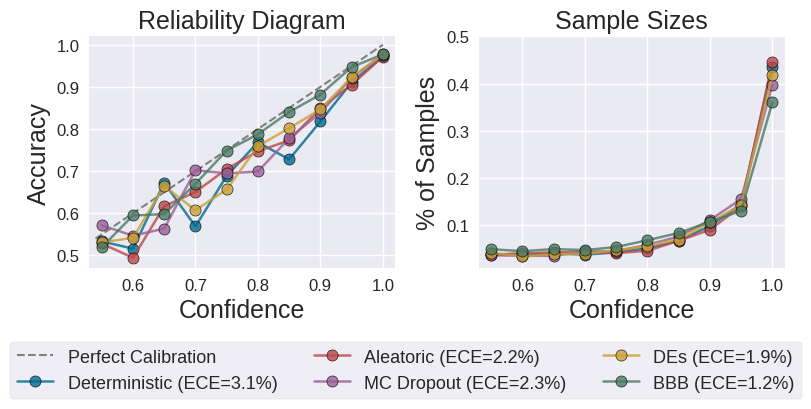

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Custom colors
colors = [
    '#006B8E',  # Teal Blue
    '#BC4749',  # Brick Red
    '#9B5F96',  # Mauve
    '#CBA135',  # Gold
    '#4C7A63'   # Muted Forest Green
]

model_names = ['Deterministic', 'Aleatoric', 'MC Dropout', 'DEs', 'BBB']  # Reordered for plotting

# Paths
ece_paths = {
    'BBB': 'eces/vi.npy',
    'DEs': 'eces/ensembles.npy',
    'Aleatoric': 'eces/Noisy-Final.npy',
    'MC Dropout': 'eces/mcd.npy',
    'Deterministic': 'eces/det-45.npy'
}

size_paths = {
    k: v.replace('.npy', '_sizes.npy') for k, v in ece_paths.items()
}

ECE = {
    'BBB': 0.012,
    'DEs': 0.019,
    'Aleatoric': 0.022,
    'MC Dropout': 0.023,
    'Deterministic': 0.031
}

num_bins = 19
bins = np.linspace(0.1, 1, num_bins)


# Load data
ece_data = {k: np.load(v).tolist() for k, v in ece_paths.items()}
size_data = {k: (np.load(v)/np.load(v).sum()).tolist() for k, v in size_paths.items()}

for model in model_names:
    ece_data[model][:9] = [np.nan] * 9
    size_data[model][:9] = [np.nan] * 9


print(size_data)

# Plotting
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

# ---- Plot 1: Reliability diagram (Accuracy vs Confidence) ----
ax1 = axes[0]
ax1.set_xlim(0.54, 1.02)
ax1.set_ylim(0.47, 1.02)
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Accuracy")
# ax1.set_aspect('equal', adjustable='box')
ax1.set_title("Reliability Diagram")

ax1.plot([0.54, 1], [0.54, 1], '--', color='gray', linewidth=1.5, label='Perfect Calibration')

for i, name in enumerate(model_names):
    # ax1.plot(bins, ece_data[name], label=f"{name} (ECE={ECE[name]*100:.1f}%)", color=colors[i], linewidth=2)
    ax1.plot(
        bins,
        ece_data[name],
        label=f"{name} (ECE={ECE[name]*100:.1f}%)",
        linewidth=1.8,
        # linestyle='--',
        marker='o',
        markersize=8,
        markeredgecolor='black',
        markeredgewidth=0.5,
        alpha=0.8,
        color=colors[i]
    )

# ---- Plot 2: Size vs Confidence ----
ax2 = axes[1]
for i, name in enumerate(model_names):
    # ax2.plot(bins, size_data[name], label=name, color=colors[i], linewidth=2)
    ax2.plot(
        bins,
        size_data[name],
        linewidth=1.8,
        # linestyle='--',
        marker='o',
        markersize=8,
        markeredgecolor='black',
        markeredgewidth=0.5,
        alpha=0.8,
        color=colors[i]
    )
    

ax2.set_xlim(0.53, 1.02)
ax2.set_ylim(0.01, 0.5)
ax2.set_xlabel("Confidence")
ax2.set_ylabel("% of Samples")
ax2.set_aspect('auto')
ax2.set_title("Sample Sizes")

# ---- Shared Legend below ----
fig.legend(
    loc='lower center',
    ncol=3,
    frameon=True,
    bbox_to_anchor=(0.5, -0.05)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.30)  # Make space for the legend
fig.savefig(f"final_figures/ece_without_aleatoric.png", dpi=300, bbox_inches='tight', pad_inches=0.0)

plt.show()


In [48]:
models = {}
ECE = {}
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
models['VI'] = np.load('eces/noisy-vi.npy').tolist()
models['samples'] = np.load('eces/noisy-vi_sizes.npy')
# models['samples'] = models['samples']/models['samples'].sum()

In [ ]:
models['samples']

array([1973.,  789.,  557.,  436.,  415.,  415.,  436.,  557.,  789.,
       1973.])

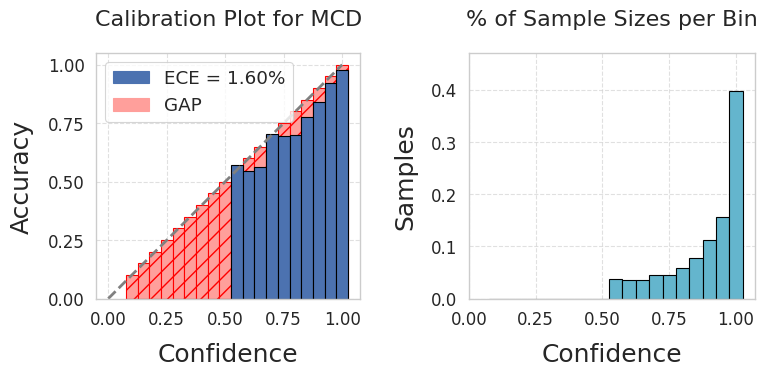

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load Seaborn's built-in style
sns.set(style="whitegrid", context="paper", font_scale=1.5)  # 'paper' context is ideal for publications

# Assuming you have models and ECE data already loaded
models = {}
ECE = {}
bins = np.linspace(0.1, 1, 19)
models['VI'] = np.load('eces/mcd.npy').tolist()
models['samples'] = np.load('eces/cd_sizes.npy')
models['samples'] = models['samples']/models['samples'].sum()
ECE['VI'] = 0.016
# Create the figure and axis with refined size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 1]})

# Plot identity (perfect calibration) line
ax1.plot([0,1],[0,1], '--', color='gray', linewidth=2, label='Perfect Calibration')

# Plot error bars as background with improved color aesthetics
ax1.bar(bins, bins, width=0.05, alpha=1.0, edgecolor='red', color=sns.color_palette("pastel")[3], hatch='//')

# Plot actual model predictions with a bolder color
ax1.bar(bins, models['VI'], width=0.05, alpha=1.0, edgecolor='black', color=sns.color_palette("deep")[0], label='VI Model')

# Maintain equally spaced axes
ax1.set_aspect('equal', adjustable='box')

# ax1.set_xlim(0.5, 1)

# Add title and labels with clean font style
ax1.set_title('Calibration Plot for MCD', fontsize=16, pad=20)
ax1.set_xlabel('Confidence', fontsize=18, labelpad=10)
ax1.set_ylabel('Accuracy', fontsize=18, labelpad=10)

# Customize ticks for better readability
ax1.set_xticks(np.linspace(0, 1, 5))
ax1.set_yticks(np.linspace(0, 1, 5))
ax1.tick_params(axis='both', which='major', labelsize=12)

# Add grid with subtle styling
ax1.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# Add ECE to the legend with a more compact and elegant style
ECE_patch = mpatches.Patch(color=sns.color_palette("deep")[0], label='ECE = {:.2f}%'.format(ECE['VI'] * 100))
GAP_patch = mpatches.Patch(color=sns.color_palette("pastel")[3], label = 'GAP')
legend_elements = [ECE_patch, GAP_patch]
ax1.legend(handles=legend_elements, loc='upper left', frameon=True)

ax2.bar(bins, models['samples'], width=0.05, color=sns.color_palette("deep")[9], edgecolor='black')
ax2.set_title('% of Sample Sizes per Bin', fontsize=16, pad=20)
ax2.set_xlabel('Confidence', fontsize=18, labelpad=10)
ax2.set_ylabel('Samples', fontsize=18, labelpad=10)

# Customize ticks for the second plot
ax2.set_xticks(np.linspace(0, 1, 5))
ax2.tick_params(axis='both', which='major', labelsize=12)

ax2.set_ylim([0,0.47])

# Add grid to the second plot
ax2.grid(True, linestyle='--', alpha=0.7, color='lightgray')
# Tight layout for a clean fit
plt.tight_layout()
plt.savefig('plots/calibration/final/calibration_noisy-mcd.png', dpi=200)

In [22]:
models['samples']/models['samples'].sum()

array([0.47697842, 0.07985612, 0.04940048, 0.04028777, 0.0381295 ,
       0.0383693 , 0.04028777, 0.04508393, 0.08681055, 0.10479616])